In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import random
import math
import csv
from scipy.stats import poisson 
from scipy.integrate import quad
import sklearn.metrics.pairwise as sk

# Set the parameters and import the data

In [15]:
N_all = 200
n_tasks = 4
n_latent = 2
n_missing_values = 50
n_folds = 1
epochs = 500
plot_interpolation = "None"
missing_experiment = True
folder = '../Data/synthetic_experiments/'

In [16]:
# Data
outputs_txt = np.loadtxt('../Data/synthetic_experiments/outputs')
inputs = np.loadtxt('../Data/synthetic_experiments/inputs')
intensities = np.transpose(np.loadtxt('../Data/synthetic_experiments/sample_intensity')) 
weights_data_task_noisy = np.load('../Data/synthetic_experiments/weights_data_task_noisy.npy')
process_values_noisy = np.load('../Data/synthetic_experiments/process_values_noisy.npy')
offset_data_noisy = np.load('../Data/synthetic_experiments/offset_data_noisy.npy')

In [17]:
outputs_noMissing = np.load('../Data/synthetic_experiments/outputs_noMissing.npy')
outputs = np.load('../Data/synthetic_experiments/outputs.npy')
inputs = np.load('../Data/synthetic_experiments/inputs.npy')
intensities = np.transpose(np.load('../Data/synthetic_experiments/sample_intensity.npy'))[0] + 15
original_inputs = np.load('../Data/synthetic_experiments/original_inputs_synthetic.npy')

In [19]:
random_noise_vector = np.load('../Data/synthetic_experiments/random_noise_vector.npy')

In [20]:
# Results for ST
final_dataset_ST_Normal = np.load(folder + 'final_dataset_Normal_LGCP_'+ str(missing_experiment)+'.npy')[0]
latent_means_ST_Normal = np.load(folder + 'latent_means_Normal_LGCP_'+str(missing_experiment)+'.npy')[0]
latent_vars_ST_Normal = np.load(folder + 'latent_variances_Normal_LGCP_'+str(missing_experiment)+'.npy')[0]
means_w_ST_Normal = np.load(folder + 'means_weights_Normal_LGCP_'+str(missing_experiment)+'.npy')[0]
vars_w_ST_Normal = np.load(folder + 'covars_weights_Normal_LGCP_'+str(missing_experiment)+'.npy')[0]
offsets_ST_Normal = np.load(folder + 'offsets_Normal_LGCP_'+str(missing_experiment)+'.npy')[0]

In [21]:
# Results for MT Normal
final_dataset_MT_Normal = np.load(folder + 'final_dataset_Normal_MCPM_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_Normal = np.load(folder + 'latent_means_Normal_MCPM_'+str(missing_experiment)+'.npy')
latent_vars_MT_Normal = np.load(folder + 'latent_variances_Normal_MCPM_'+str(missing_experiment)+'.npy')
means_w_MT_Normal = np.load(folder + 'means_weights_Normal_MCPM_'+str(missing_experiment)+'.npy')
vars_w_MT_Normal = np.load(folder + 'covars_weights_Normal_MCPM_'+str(missing_experiment)+'.npy')
offsets_MT_Normal = np.load(folder + 'offsets_Normal_MCPM_'+str(missing_experiment)+'.npy')

In [22]:
# Results for MT GP
final_dataset_MT_GP = np.load(folder + 'final_dataset_GP_MCPM_'+ str(missing_experiment)+'.npy')[0]
latent_means_MT_GP = np.load(folder + 'latent_means_GP_MCPM_'+str(missing_experiment)+'.npy')
latent_vars_MT_GP = np.load(folder + 'latent_variances_GP_MCPM_'+str(missing_experiment)+'.npy')
means_w_MT_GP = np.load(folder + 'means_weights_GP_MCPM_'+str(missing_experiment)+'.npy')
vars_w_MT_GP = np.load(folder + 'covars_weights_GP_MCPM_'+str(missing_experiment)+'.npy')
offsets_MT_GP = np.load(folder + 'offsets_GP_MCPM_'+str(missing_experiment)+'.npy')

In [28]:
# Results for ICM
mu_0 = np.loadtxt('../Data/synthetic_experiments/mu_0')
mu_1 = np.loadtxt('../Data/synthetic_experiments/mu_1')
mu_2 = np.loadtxt('../Data/synthetic_experiments/mu_2')
mu_3 = np.loadtxt('../Data/synthetic_experiments/mu_3')
var_0 = np.loadtxt('../Data/synthetic_experiments/var_0')
var_1 = np.loadtxt('../Data/synthetic_experiments/var_1')
var_2 = np.loadtxt('../Data/synthetic_experiments/var_2')
var_3 = np.loadtxt('../Data/synthetic_experiments/var_3')
mu = np.zeros((200,4))
mu[:,0] = mu_0
mu[:,1] = mu_1
mu[:,2] = mu_2
mu[:,3] = mu_3
var = np.zeros((200,4))
var[:,0] = var_0
var[:,1] = var_1
var[:,2] = var_2
var[:,3] = var_3
posterior_mean = np.exp(mu + 0.5*var)
posterior_var = (np.exp(var) - 1.)*np.exp(2.0*mu + var)

# Get the predictions for each method and prior specification

In [29]:
predictions_MT_Normal = final_dataset_MT_Normal[:,5:9]
predictions_ST_Normal = final_dataset_ST_Normal[:,5:9]
predictions_MT_GP = final_dataset_MT_GP[:,5:9]

# Define the indeces of missing values

In [30]:
index1 = xrange(10,60)
index1_non_missing1 = xrange(0,10)
index1_non_missing2 = xrange(60,200)

index2 = xrange(30,80)
index2_non_missing1 = xrange(0,30)
index2_non_missing2 = xrange(80,200)

index3 = xrange(140,190)
index3_non_missing1 = xrange(0,140)
index3_non_missing2 = xrange(190,200)

index4 = xrange(50,100)
index4_non_missing1 = xrange(0,50)
index4_non_missing2 = xrange(100,200)

indeces_missing = np.transpose(np.reshape(np.concatenate((index1,index2, index3, index4)), 
                                          (n_tasks, n_missing_values)))


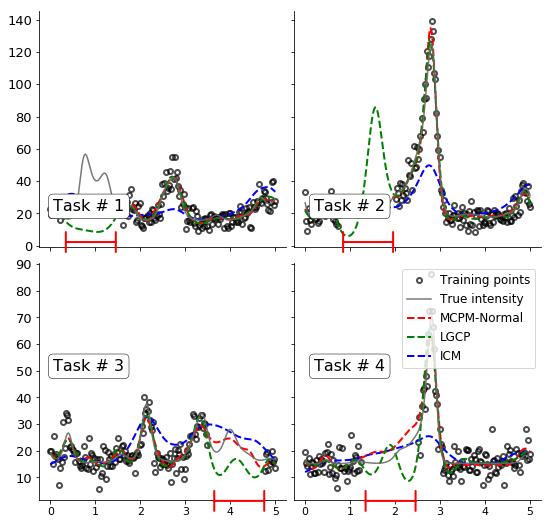

In [33]:
# Figure 1 - Normal prior
length=6
width=4
markersize = 5
trans_point = 0.7
trans_line = 0.9
col_true = 'dimgrey'
col_mt = 'red'
col_mt_gp = 'green'
style_gp = '--'
col_st = 'green'
style_st = '--'
col_pooling = "darkviolet"
col_dots = 'black'
col_icm = 'blue'
style_icm = '--'
lenght_interval = 2
style_arrow = '|-|'
style_data = 'o'
face_color= 'none'
color_interval = 'orange'

# font = {'family': 'serif',
#         'color':  'black',
#         'weight': 'normal',
#         'size': 16,
#         }

font = {'color':  'black',
        'weight': 'normal',
        'size': 16,
        }


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = 'row', sharex = True)
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# sharex = 'col', sharey = 'row'

f.set_figheight(9)
f.set_figwidth(9)


ax1.plot(original_inputs[indeces_missing[:,0],], outputs[indeces_missing[:,0],0], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax1.plot(original_inputs[index1_non_missing1,], outputs[index1_non_missing1,0], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax1.plot(original_inputs[index1_non_missing2,], outputs[index1_non_missing2,0],style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax1.plot(original_inputs, posterior_mean[:,0], '--', mew=2,linewidth=2.0, color = col_icm)

ax1.plot(original_inputs, predictions_MT_Normal[:,0], '--', mew=2, linewidth=2.0, color = col_mt)
#ax1.plot(inputs, predictions_MT_GP[:,0], '--', mew=2, linewidth=2.0, color = col_mt_gp)
ax1.plot(original_inputs, predictions_ST_Normal[:,0], '--', mew=2, linewidth=2.0, color = col_st)
ax1.plot(original_inputs, intensities[:,0], '-', mew=2, color = col_true, markersize=4, alpha=trans_line)

ax1.xaxis.set_visible(True)
ax1.tick_params(labelsize=11)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

a, b = inputs[10], inputs[60]
#ax1.set_xticks(())
#ax1.set_xticklabels(('',''),color = 'red', visible = True)
# ax1.tick_params(axis = "x", color = 'red',length=length,width=width)

ax1.annotate('', xy=(1.5, 2.3),xytext=(0.3,2.3),                     #draws an arrow from one set of coordinates to the other
            arrowprops=dict(arrowstyle=style_arrow,facecolor='red',color='red', linewidth = lenght_interval),   #sets style of arrow and colour
            annotation_clip=False)  


ax2.plot(original_inputs[indeces_missing[:,1],], outputs[indeces_missing[:,1],1], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
training_points, = ax2.plot(original_inputs[index2_non_missing1,], outputs[index2_non_missing1,1], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax2.plot(original_inputs[index2_non_missing2,], outputs[index2_non_missing2,1], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ICM, = ax2.plot(original_inputs, posterior_mean[:,1], '--', mew=2,linewidth=2.0, color = col_icm)

mtLGCP, = ax2.plot(original_inputs, predictions_MT_Normal[:,1], '--', mew=2, linewidth=2.0, color = col_mt)
#mtLGCP_GP, = ax2.plot(inputs, predictions_MT_GP[:,1], '--', mew=2, linewidth=2.0, color = col_mt_gp)
single_LGCP, = ax2.plot(original_inputs, predictions_ST_Normal[:,1], '--', mew=2, linewidth=2.0, color = col_st)
true_intensity, =ax2.plot(original_inputs, intensities[:,1], '-', mew=2, color = col_true, markersize=4, alpha=trans_line)

ax2.xaxis.set_visible(True)
ax2.tick_params(labelsize=11)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

a, b = inputs[30], inputs[80]
#ax2.set_xticks(())
#ax2.set_xticklabels(('',''),color = 'red', visible = True)
#ax2.tick_params(axis = "x", color = 'red',length=length,width=width)
ax2.annotate('', xy=(2.0, 2.3),xytext=(0.8,2.3),                     #draws an arrow from one set of coordinates to the other
            arrowprops=dict(arrowstyle=style_arrow,facecolor='red',color='red', linewidth = lenght_interval),   #sets style of arrow and colour
            annotation_clip=False)  



ax3.plot(original_inputs[indeces_missing[:,2],], outputs[indeces_missing[:,2],2], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax3.plot(original_inputs[index3_non_missing1,], outputs[index3_non_missing1,2],style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax3.plot(original_inputs[index3_non_missing2,], outputs[index3_non_missing2,2], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax3.plot(original_inputs, posterior_mean[:,2], '--', mew=2,linewidth=2.0, color = col_icm)

ax3.plot(original_inputs, predictions_MT_Normal[:,2], '--', mew=2, linewidth=2.0, color = col_mt)
#ax3.plot(inputs, predictions_MT_GP[:,2], '--', mew=2, linewidth=2.0, color = col_mt_gp)
ax3.plot(original_inputs, predictions_ST_Normal[:,2], '--', mew=2, linewidth=2.0, color = col_st)
ax3.plot(original_inputs, intensities[:,2], '-', mew=2, color = col_true, markersize=4, alpha=trans_line)

ax3.xaxis.set_visible(True)
ax3.tick_params(labelsize=11)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

a, b = inputs[140], inputs[190]
#ax3.set_xticks(())
#ax3.set_xticklabels(('',''),color = 'red', visible = True)
#ax3.tick_params(axis = "x", color = 'red',length=length,width=width)
#ax3.set_yticks((0,30,60))
ax3.annotate('', xy=(4.8, 1.2),xytext=(3.6,1.2),                     #draws an arrow from one set of coordinates to the other
            arrowprops=dict(arrowstyle=style_arrow,facecolor='red',color='red', linewidth = lenght_interval),   #sets style of arrow and colour
            annotation_clip=False)  





ax4.plot(original_inputs[indeces_missing[:,3],], outputs[indeces_missing[:,3],3], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax4.plot(original_inputs[index4_non_missing1,], outputs[index4_non_missing1,3], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax4.plot(original_inputs[index4_non_missing2,], outputs[index4_non_missing2,3], style_data, mew=2, color = col_dots,  markersize=markersize, alpha=trans_point, markerfacecolor=face_color)
ax4.plot(original_inputs, posterior_mean[:,3], '--', mew=2,linewidth=2.0, color = col_icm)

ax4.plot(original_inputs, predictions_MT_Normal[:,3], '--', mew=2, linewidth=2.0, color = col_mt)
#ax4.plot(inputs, predictions_MT_GP[:,3], '--', mew=2, linewidth=2.0, color = col_mt_gp)
ax4.plot(original_inputs, predictions_ST_Normal[:,3], '--', mew=2, linewidth=2.0, color = col_st)
ax4.plot(original_inputs, intensities[:,3], '-', mew=2, color = col_true, markersize=4, alpha=trans_line)

ax4.xaxis.set_visible(True)
ax4.tick_params(labelsize=11)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

a, b = inputs[50], inputs[100]
#ax4.set_xticks(())
#ax4.set_xticklabels(('',''),color = 'red', visible = True)
#ax4.tick_params(axis = "x", color = 'red',length=length,width=width)
ax4.annotate('', xy=(2.5, 1.2),xytext=(1.3,1.2),                     #draws an arrow from one set of coordinates to the other
            arrowprops=dict(arrowstyle=style_arrow,facecolor='red',color='red', linewidth = lenght_interval),   #sets style of arrow and colour
            annotation_clip=False)  

#ax4.annotate('', xy=(-0.92, -4),xytext=(0.08,-4),                     #draws an arrow from one set of coordinates to the other
#           arrowprops=dict(arrowstyle=style_arrow,facecolor='red',color='red', linewidth = lenght_interval),   #sets style of arrow and colour
#          annotation_clip=False)  
#ax4.legend([training_points, true_intensity, mtLGCP,mtLGCP_GP, single_LGCP, ICM], 
#           ['Training points', 'True intensity', 'LGCPN-Normal','LGCPN-GP', 'LGCP', 'ICM'],prop={'size': 12},
#           loc='upper right',fancybox=True, shadow=False, ncol=1)

ax4.legend([training_points, true_intensity, mtLGCP,single_LGCP, ICM], 
           ['Training points', 'True intensity', 'MCPM-Normal','LGCP', 'ICM'],prop={'size': 12},
           loc='upper right',fancybox=True, shadow=False, ncol=1)

ax1.tick_params(axis='y', labelsize=13)
ax3.tick_params(axis='y', labelsize=13)



bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)


plt.text(-5.6, 110,'Task # 1', fontdict=font,bbox=bbox_props )
plt.text(0.2, 110, 'Task # 2', fontdict=font,bbox=bbox_props )
plt.text(-5.6, 50, 'Task # 3', fontdict=font,bbox=bbox_props )
plt.text(0.2, 50, 'Task # 4', fontdict=font,bbox=bbox_props )



f.subplots_adjust(hspace=0.07)
f.subplots_adjust(wspace=0.03)
#f.suptitle('Normal prior', fontsize=14)

#f.savefig('synthetic_noise.png')
plt.show()


## Compute perf

In [34]:
RMSE_MT_Normal = np.zeros((n_tasks))
RMSE_ST_Normal = np.zeros((n_tasks))
RMSE_ICM = np.zeros((n_tasks))
RMSE_MT_GP = np.zeros((n_tasks))

NLPL_MT_Normal = np.zeros((n_tasks))
NLPL_MT_GP = np.zeros((n_tasks))
NLPL_ST_Normal = np.zeros((n_tasks))
NLPL_ICM = np.zeros((n_tasks))

In [35]:
for task in xrange(n_tasks):
    RMSE_MT_Normal[task] = np.sqrt(np.sum(np.square(outputs_noMissing[indeces_missing[:,task],task] - predictions_MT_Normal[indeces_missing[:,task],task]))/n_missing_values)
    RMSE_ST_Normal[task] = np.sqrt(np.sum(np.square(outputs_noMissing[indeces_missing[:,task],task] - predictions_ST_Normal[indeces_missing[:,task],task]))/n_missing_values)
    RMSE_ICM[task] = np.sqrt(np.sum(np.square(outputs_noMissing[indeces_missing[:,task],task] - posterior_mean[indeces_missing[:,task],task]))/n_missing_values)
    RMSE_MT_GP[task] = np.sqrt(np.sum(np.square(outputs_noMissing[indeces_missing[:,task],task] - predictions_MT_GP[indeces_missing[:,task],task]))/n_missing_values)

    
    NLPL_MT_Normal[task] = - np.sum(poisson.logpmf(np.around(outputs_noMissing[indeces_missing[:,task],task]),predictions_MT_Normal[indeces_missing[:,task],task]))/n_missing_values
    NLPL_ST_Normal[task] = - np.sum(poisson.logpmf(np.around(outputs_noMissing[indeces_missing[:,task],task]),predictions_ST_Normal[indeces_missing[:,task],task]))/n_missing_values

    NLPL_ICM[task] = - np.sum(poisson.logpmf(np.around(outputs_noMissing[indeces_missing[:,task],task]),posterior_mean[indeces_missing[:,task],task]))/n_missing_values
    NLPL_MT_GP[task] = - np.sum(poisson.logpmf(np.around(outputs_noMissing[indeces_missing[:,task],task]),predictions_MT_GP[indeces_missing[:,task],task]))/n_missing_values


In [36]:
RMSE_MT_Normal

array([17.86133812,  6.78434146,  4.94193268,  5.54924301])

In [37]:
RMSE_ICM

array([17.92180402,  8.52390213,  7.26085376,  5.75760377])

In [38]:
NLPL_MT_Normal

array([7.84416355, 3.4713037 , 3.02927179, 3.21089003])

In [39]:
NLPL_ICM

array([7.86961306, 3.929407  , 3.58918824, 3.25293771])

In [40]:
RMSE_MT_GP

array([17.44796131,  6.39437366,  5.05449114,  5.26794648])

In [41]:
NLPL_MT_GP

array([7.53368095, 3.36775309, 3.04949624, 3.12935792])

In [42]:
RMSE_ST_Normal

array([28.61193695, 32.34253484,  9.14009226,  9.90300674])

In [43]:
NLPL_ST_Normal

array([24.38660545, 15.00559522,  4.95513638,  5.53967405])

In [51]:
## Use this if you want to compute nlpl using samples from posterior distributions
np.random.seed(1)
n_samples = 100
intensity_sample = np.zeros((n_samples, N_all, n_tasks))
latent_fun_sample = np.zeros((n_samples, N_all, n_latent))
weights_sample = np.zeros((n_samples, n_tasks, n_latent))
nlpl_fold_task = np.zeros((n_samples, n_tasks))

diagonal_variance = np.zeros((n_latent, n_tasks))
for q in xrange(n_latent):
    diagonal_variance[q] = np.diagonal(vars_w_MT_Normal[q])
latent_fun_sample = np.random.normal(latent_means_MT_Normal, np.sqrt(latent_vars_MT_Normal), size = (n_samples, N_all, n_latent)) 
weights_sample = np.random.normal(means_w_MT_Normal, np.sqrt(diagonal_variance), size = (n_samples, n_latent,n_tasks))

for i in xrange(n_samples):
    intensity_sample[i] = np.exp(np.transpose(np.dot(np.transpose(weights_sample[i]), np.transpose(latent_fun_sample[i]))) + np.transpose(offsets_MT_Normal))



In [52]:
for i in xrange(n_samples):
    for task in xrange(n_tasks):
        true_counts =  np.around(outputs_noMissing[indeces_missing[:,task],task])
        pred_counts = intensity_sample[i, :,task][indeces_missing[:,task]]
        nlpl_fold_task[i,task] = - np.sum(poisson.logpmf(true_counts, pred_counts))


In [53]:
np.mean(nlpl_fold_task, axis = 0)/n_missing_values

array([7.93371568, 3.77618963, 3.1154574 , 3.32578665])